In [1]:
import numpy as np
import pandas as pd
import copy as cp
import matplotlib.pyplot as plt

In [2]:
# See sewerWRRF/stormSelection.ipynb for readying storm events and sewer outflow results for WRRF influent

# Set as 0 if using results from no control simulation
# Set as 1 if using results from control, flow/TSS load simulation
# Set as 2 if using results from control, flow simulation
# Set as 3 if using results from control, TSS load simulation
save = 0

stormNo = '4'

controlNo = '01'

# Load storm event data (LBC results, for sewer subsection only)
# WRRF flow is in units of cubic feet/sec
# WRRF TSS load is in units of lb/sec
# WRRF TSS concentration is in units of mg/L
storm_nocontrol = np.load('../data/storm'+stormNo+'.npy', allow_pickle=True)

if save == 0:
    storm = cp.deepcopy(storm_nocontrol)
    file_c = 'nc'
elif save == 1:
    storm_control = np.load('../data/storm'+stormNo+'_control_both_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_both'
elif save == 2:
    storm_control = np.load('../data/storm'+stormNo+'_control_flow_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_flow'
elif save == 3:
    storm_control = np.load('../data/storm'+stormNo+'_control_TSS_'+controlNo+'.npy', allow_pickle=True)
    storm = cp.deepcopy(storm_control)
    file_c = 'c_TSS'

# File name for influent tsv
w_influentTSV = 'C:/Users/Sara/Desktop/sewerWRRF/data/storm'+stormNo+'_'+file_c+'_'+controlNo+'_influent.tsv'

In [3]:
# Check storm event data contents
storm

array({'time': array([[ 1.],
       [ 1.],
       [ 1.],
       ...,
       [62.],
       [62.],
       [62.]], dtype=float16), 'WRRF_flow': array([[216.5429845 ],
       [216.54935898],
       [216.55573526],
       ...,
       [217.13836508],
       [217.14427609],
       [217.15018925]]), 'WRRF_TSSLoad': array([[2.20316591],
       [2.20331199],
       [2.20345805],
       ...,
       [2.20827788],
       [2.20841949],
       [2.20856108]]), 'WRRF_TSSConc': array([[162.9300694 ],
       [162.93607576],
       [162.94207918],
       ...,
       [162.86033227],
       [162.86634194],
       [162.8723487 ]]), 'WRRF_flow_dry': array([217.12645019, 217.13237295, 217.13829766, ..., 217.50145411,
       217.5070627 , 217.51267354]), 'WRRF_TSSLoad_dry': array([2.22114007, 2.22127794, 2.2214158 , ..., 2.21525312, 2.21539074,
       2.21552835]), 'WRRF_flow_wet': array([-0.58346568, -0.58301397, -0.5825624 , ..., -0.36308903,
       -0.36278661, -0.36248429]), 'WRRF_TSSLoad_wet': array([-0.01

Text(0, 0.5, 'Sewer Flow (m3/s)')

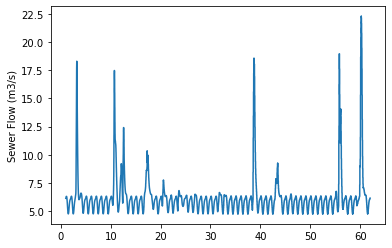

In [4]:
# Flow in sewer subsection (only)
# Units of m3/s (converted from ft3/s)
sewer_flow = storm.item().get('WRRF_flow') / 35.3147
plt.plot(storm.item().get('time'),sewer_flow)
plt.ylabel('Sewer Flow (m3/s)')

Text(0, 0.5, 'Sewer TSS Concentration (mg/L)')

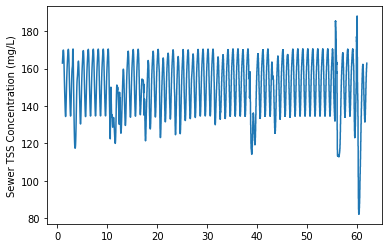

In [5]:
# TSS concentration in sewer subsection (only)
plt.plot(storm.item().get('time'),storm.item().get('WRRF_TSSConc'))
plt.ylabel('Sewer TSS Concentration (mg/L)')

Text(0, 0.5, 'NO CONTROL Sewer Flow (m3/s)')

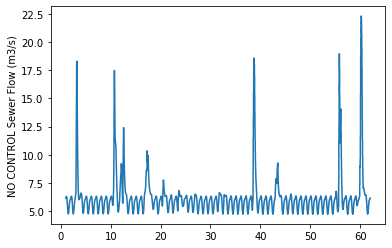

In [6]:
# Flow in sewer subsection (only)
# NO CONTROL results shown here
# Units of m3/s (converted from ft3/s)
plt.plot(storm_nocontrol.item().get('time'),storm_nocontrol.item().get('WRRF_flow') / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

5.66766741173757

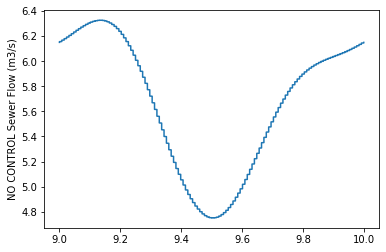

In [7]:
# Plot section that is dry-weather only
# Will average over this section to get dry-weather average value
# This is done for the NO CONTROL results shown above
# Units of m3/s (converted from ft3/s)
# Storm 1: 8:-1
# Storm 2: 0:1
# Storm 3: 0:1
# Storm 4: 8:9

if stormNo == '1':
    dw_start = 8*24*60*60/10
    dw_end = -1
elif stormNo == '2':
    dw_start = 0*24*60*60/10
    dw_end = 1*24*60*60/10
elif stormNo == '3':
    dw_start = 0*24*60*60/10
    dw_end = 1*24*60*60/10
elif stormNo == '4':
    dw_start = 8*24*60*60/10
    dw_end = 9*24*60*60/10
plt.plot(storm_nocontrol.item().get('time')[int(dw_start):int(dw_end)],storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)] / 35.3147)
plt.ylabel('NO CONTROL Sewer Flow (m3/s)')

# Units of m3/s
seweroutflow = np.mean(storm_nocontrol.item().get('WRRF_flow')[int(dw_start):int(dw_end)]) / 35.3147
seweroutflow

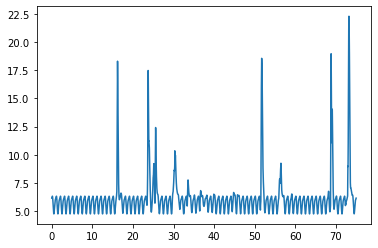

In [8]:
# IF NO CONTROL OR STORMS 2 OR 3, RUN THIS

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 14
nodwdays_end = 0

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
# Storm 4: 62-1
if stormNo == '1':
    nostormdays = 10-1
elif stormNo == '2':
    nostormdays = 53-35
elif stormNo == '3':
    nostormdays = 37-28
elif stormNo == '4':
    nostormdays = 62-1

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)

if stormNo != '4':
    for _ in range(0,nodwdays_end):
        dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
        dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)

    sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
    WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(storm.item().get('WRRF_TSSConc'),dw_TSSConc_end))
else:
    sewer_flow = np.append(dw_flow_begin,sewer_flow)
    WRRF_TSSConc = np.append(dw_TSSConc_begin,storm.item().get('WRRF_TSSConc'))

plt.plot(time_storm,sewer_flow)

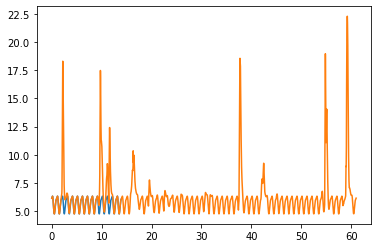

In [9]:
plt.plot(time_storm[0:nodwdays_begin*8640],dw_flow_begin)
plt.plot(time_storm[0:nostormdays*8640],sewer_flow[nodwdays_begin*8640:(nodwdays_begin+nostormdays)*8640])
#plt.xlim((2.,2.3))

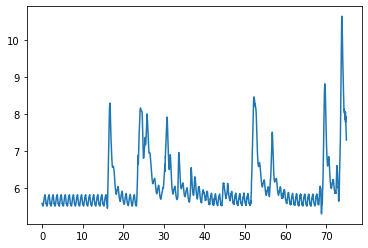

In [25]:
# IF CONTROL AND STORM 1/4, RUN THIS
# Need for pre-storm and storm flow, etc. to line up

dw_flow_begin = []
dw_flow_end = []
dw_TSSConc_begin = []
dw_TSSConc_end = []
nodwdays_begin = 14
nodwdays_end = 0

# Storm 1: 10-1
# Storm 2: 53-35
# Storm 3: 37-28
# Storm 4: 62-1
if stormNo == '1':
    nostormdays = 10-1
elif stormNo == '4':
    nostormdays = 62-1

# Storm 1: 2.1
# Storm 2: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
# Storm 3: RUN ABOVE 'NO CONTROL' CELL; NO EXTRA BIT
extra_bit = 2.1

time_storm = np.linspace(0.,nodwdays_begin+nostormdays+nodwdays_end,num=int((nodwdays_begin+nostormdays+nodwdays_end)*24*60*60/10))

for _ in range(0,nodwdays_begin):
    dw_flow_begin = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_begin)
    dw_TSSConc_begin = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_begin)
dw_flow_begin = np.append(dw_flow_begin,dw_flow_begin[0:int(extra_bit*24*60*60/10+1)])
dw_TSSConc_begin = np.append(dw_TSSConc_begin,dw_TSSConc_begin[0:int(extra_bit*24*60*60/10+1)])

if stormNo != '4':
    for _ in range(0,nodwdays_end):
        dw_flow_end = np.append(sewer_flow[int(dw_start):int(dw_start+24*60*60/10)],dw_flow_end)
        dw_TSSConc_end = np.append(storm.item().get('WRRF_TSSConc')[int(dw_start):int(dw_start+24*60*60/10)],dw_TSSConc_end)
    
    sewer_flow = sewer_flow[int(extra_bit*24*60*60/10):-1]
    WRRF_TSSConc = storm.item().get('WRRF_TSSConc')[int(extra_bit*24*60*60/10):-1]
    
    sewer_flow = np.append(dw_flow_begin,np.append(sewer_flow,dw_flow_end))
    WRRF_TSSConc = np.append(dw_TSSConc_begin,np.append(WRRF_TSSConc,dw_TSSConc_end))
else:
    sewer_flow = sewer_flow[int(extra_bit*24*60*60/10):-1]
    WRRF_TSSConc = storm.item().get('WRRF_TSSConc')[int(extra_bit*24*60*60/10):-1]
    
    sewer_flow = np.append(dw_flow_begin,sewer_flow)
    WRRF_TSSConc = np.append(dw_TSSConc_begin,WRRF_TSSConc)

plt.plot(time_storm,sewer_flow)

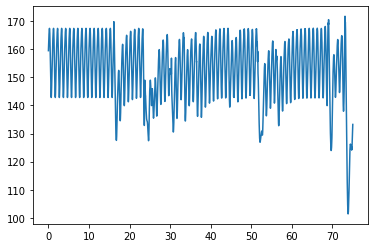

In [26]:
plt.plot(time_storm,WRRF_TSSConc)

In [10]:
### OLD Using ./data/flowPrecip.xlsx average dry-weather WRRF inflow is about 520.30 Mgal/d (1,969,500 m3/d, )
### OLD Average WRRF inflow is 2,788,860 m3/d

# Using GLWA WRRF model, steady-state flow is 2,100,000 m3/d
# Converting m3/d to m3/s ...
WRRFinflow = 2100000 / 86400
WRRFinflow

24.305555555555557

In [11]:
# Ratio to scale from sewer subsection to GLWA WRRF influent
# Ratio should be about 4.2885
scale_ratio = WRRFinflow/seweroutflow
scale_ratio

4.288458335649596

Text(0, 0.5, 'WRRF Flow (m3/s)')

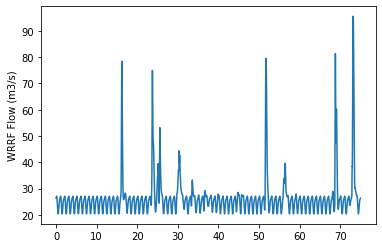

In [12]:
# Flow for GLWA WRRF influent
# Units of m3/s
plt.plot(time_storm,scale_ratio*sewer_flow)
plt.ylabel('WRRF Flow (m3/s)')

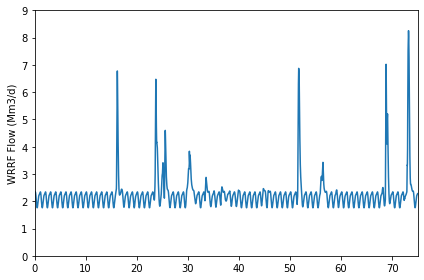

In [25]:
# Need flow for GLWA WRRF influent in units of m3/d (converted from m3/s)
WRRF_flow = scale_ratio*sewer_flow * 86400

plt.plot(time_storm,WRRF_flow/1000000)
plt.ylabel('WRRF Flow (Mm3/d)')
plt.ylim((0,9))
plt.xlim((0,75))
plt.tight_layout()
plt.savefig("C:/Users/Sara/Desktop/sewerWRRF/data/infl_q.svg")

Text(0, 0.5, 'WRRF TSS Concentration (mg/L)')

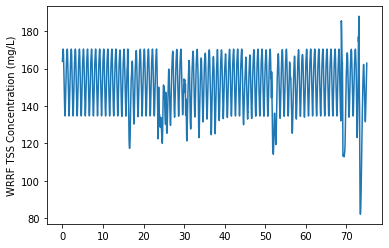

In [16]:
# TSS concentration for GLWA WRRF influent (same as that for sewer subsection since concentration)
plt.plot(time_storm,WRRF_TSSConc)
plt.ylabel('WRRF TSS Concentration (mg/L)')

In [17]:
# Using GLWA WRRF model, steady-state ...
# flow is 2,100,000 m3/d,
# TCOD is 210 mg TCOD/L,
# TKN is 20 mg N/L,
# influent TP is 2.2 mg P/L, 
# fraction of PO4 in TP is 53.3%, so influent SP is 1.1726 mg P/L,
# temperature is 20 C

2.737116460500308
1.1972288085128595


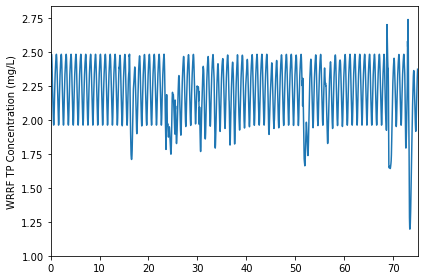

In [24]:
# For simplification, TCOD, TKN, and TP will mirror TSS dynamics
# TP will only include total phosphorus without fractionation
# The fraction of PO4 in TP will be kept at a constant value of 53.5%
# Temperature will be a constant value of 10 C

# TCOD concentration in mg/L
WRRF_TCODConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 210

# TKN concentration in mg/L
WRRF_TKNConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 20

# TP concentration in mg/L
WRRF_TPConc = WRRF_TSSConc / np.mean(WRRF_TSSConc) * 2.2

# PO4 in TP in fraction
WRRF_frPO4TP = 0.533*np.ones_like(WRRF_TSSConc)

# Temperature in C
WRRF_T = 20*np.ones_like(WRRF_TSSConc)

# Non-influent related items

# Fe mass dose in kg/d
# For base-case, set as zero
Femass = np.zeros_like(WRRF_TSSConc)

# Primary clarifier solids fraction removal in fraction
# Assume steady-state of 70%
fXTSS_sludge = 0.7*np.ones_like(WRRF_TSSConc)

# Primary clarifier sludge flow in m3/d
# Assume steady-state of 20,000 m3/d
Qsludge_target = 20000*np.ones_like(WRRF_TSSConc)

print(np.amax(WRRF_TPConc))
print(np.amin(WRRF_TPConc))

plt.plot(time_storm,WRRF_TPConc)
plt.ylabel('WRRF TP Concentration (mg/L)')
plt.xlim((0,75))
plt.ylim((1,2.833333))
plt.tight_layout()
plt.savefig("C:/Users/Sara/Desktop/sewerWRRF/data/infl_TP.svg")

In [34]:
# Subsample: every 10 seconds down to every 30 minutes (1800s) (only include every 180th element)
storm_df = pd.DataFrame(data=np.column_stack((time_storm[0::180], # d
                                        WRRF_flow[0::180], # m3/d
                                        WRRF_TCODConc[0::180], # mg/L
                                        WRRF_TKNConc[0::180], # mg/L
                                        WRRF_TPConc[0::180], # mg/L
                                        WRRF_frPO4TP[0::180], # fraction
                                        WRRF_T[0::180], # C
                                        Femass[0::180], # kg/d
                                        fXTSS_sludge[0::180], # fraction
                                        Qsludge_target[0::180])), # m3/d
                  columns=['Sumo__Time',
                           'Sumo__Plant__Influent__param__Q',
                           'Sumo__Plant__Influent__param__TCOD',
                           'Sumo__Plant__Influent__param__TKN',
                           'Sumo__Plant__Influent__param__TP',
                           'Sumo__Plant__Influent__param__frSPO4_TP',
                           'Sumo__Plant__Influent__param__T',
                           'Sumo__Plant__Metal1__param__Femass',
                           'Sumo__Plant__Primary1__param__fXTSS_sludge',
                           'Sumo__Plant__Primary1__param__Qsludge_target'])
storm_df

,Sumo__Time,Sumo__Plant__Influent__param__Q,Sumo__Plant__Influent__param__TCOD,Sumo__Plant__Influent__param__TKN,Sumo__Plant__Influent__param__TP,Sumo__Plant__Influent__param__frSPO4_TP,Sumo__Plant__Influent__param__T,Sumo__Plant__Metal1__param__Femass,Sumo__Plant__Primary1__param__fXTSS_sludge,Sumo__Plant__Primary1__param__Qsludge_target
0,0.000000,2.072163e+06,220.249820,20.976173,2.307379,0.533,20.0,0.0,0.7,20000.0
1,0.020833,2.067949e+06,221.597463,21.104520,2.321497,0.533,20.0,0.0,0.7,20000.0
2,0.041667,2.064316e+06,222.872542,21.225956,2.334855,0.533,20.0,0.0,0.7,20000.0
3,0.062500,2.061115e+06,224.083958,21.341329,2.347546,0.533,20.0,0.0,0.7,20000.0
4,0.083333,2.058280e+06,225.224332,21.449936,2.359493,0.533,20.0,0.0,0.7,20000.0
...,...,...,...,...,...,...,...,...,...,...
3595,74.895949,2.829601e+06,177.017612,16.858820,1.854470,0.533,20.0,0.0,0.7,20000.0
3596,74.916782,2.811759e+06,178.063309,16.958410,1.865425,0.533,20.0,0.0,0.7,20000.0
3597,74.937616,2.781598e+06,179.668828,17.111317,1.882245,0.533,20.0,0.0,0.7,20000.0
3598,74.958449,2.757647e+06,181.024462,17.240425,1.896447,0.533,20.0,0.0,0.7,20000.0


In [35]:
with open(w_influentTSV,'w') as write_tsv:
    write_tsv.write(storm_df.to_csv(sep='\t', index=False))